# Task 2 - Prediction of store sales

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Get the merged data of the train and store

In [22]:
logging.info('fetch the csv data')
df = pd.read_csv('../data/merged.csv')
df = df.head(100000)
print(len(df))

100000


/tmp/ipykernel_11918/1568794758.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/merged.csv')


In [23]:
logging.info('check for missing values')
print(df.isnull().sum())

Id                           0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsMonthStart                 0
IsMonthEnd                   0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
DayOfMonth                   0
dtype: int64


In [24]:
logging.info('fill missing values')
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna(0, inplace=True)

df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

/tmp/ipykernel_11918/1314532227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2SinceWeek'].fillna(0, inplace=True)
/tmp/ipykernel_11918/1314532227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [25]:
logging.info('check for missing values')
print(df.isnull().sum())

Id                           0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsMonthStart                 0
IsMonthEnd                   0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
DayOfMonth                   0
dtype: int64


In [26]:
logging.info('Get additional paramaeters from the Date column')
df['DayOfMonth'] = pd.to_datetime(df['Date']).dt.day
df['IsMonthStart'] = pd.to_datetime(df['Date']).dt.is_month_start
df['IsMonthEnd'] = pd.to_datetime(df['Date']).dt.is_month_end 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Id                         100000 non-null  int64  
 1   DayOfWeek                  100000 non-null  int64  
 2   Date                       100000 non-null  object 
 3   Sales                      100000 non-null  int64  
 4   Customers                  100000 non-null  int64  
 5   Open                       100000 non-null  int64  
 6   Promo                      100000 non-null  int64  
 7   StateHoliday               100000 non-null  object 
 8   SchoolHoliday              100000 non-null  int64  
 9   CompetitionDistance        100000 non-null  float64
 10  CompetitionOpenSinceMonth  100000 non-null  float64
 11  CompetitionOpenSinceYear   100000 non-null  float64
 12  Promo2                     100000 non-null  int64  
 13  Promo2SinceWeek            100

In [27]:
logging.info('Save the new features into the merged data')
df.to_csv('../data/merged.csv', index=False)

In [28]:
logging.info('one hot encoding for the categoriacal variables like store type and assortment')
if 'StoreType' in df.columns:
    df = pd.get_dummies(df, columns=['StoreType', 'Assortment'], drop_first=True, dtype=int)
if  'Assortment' in df.columns:
    df = pd.get_dummies(df, columns=['Assortment'], drop_first=True, dtype=int)
if 'StateHoliday' in df.columns:
    df = pd.get_dummies(df, columns=['StateHoliday'], drop_first=True, dtype=int)
print(df.head(5))

   Id  DayOfWeek        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0   1          4  2015-07-31   5263        555     1      1              1   
1   2          4  2015-07-31   6064        625     1      1              1   
2   3          4  2015-07-31   8314        821     1      1              1   
3   4          4  2015-07-31  13995       1498     1      1              1   
4   5          4  2015-07-31   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  StoreType_a  \
0               1270.0                        9.0  ...        False   
1                570.0                       11.0  ...         True   
2              14130.0                       12.0  ...         True   
3                620.0                        9.0  ...        False   
4              29910.0                        4.0  ...         True   

   StoreType_b  StoreType_c  StoreType_d Assortment_a  Assortment_b  \
0        False         True      

In [29]:
logging.info('Handling PromoInterval')
df['PromoInterval'] = df['PromoInterval'].fillna('0')
df['PromoMonths'] = df['PromoInterval'].apply(lambda x: len(str(x).split(',')) if x != '0' else 0)
df = df.drop('PromoInterval', axis=1)


In [30]:
logging.info("define the numerical columns")
numeric_cols = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 
                'CompetitionDistance', 'Promo2SinceYear', 'Promo2SinceWeek', 
                'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
                'IsMonthStart', 'IsMonthEnd']

In [31]:
logging.info('define the catagorical columns')
logging.info('Defining the categorical columns')
categorical_cols = [col for col in df.columns if col.startswith(('StoreType_', 'Assortment_', 'StateHoliday_'))]


In [32]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder


logging.info('define the transformer for the numerical columns')

numeric_transformer = Pipeline(steps=[('scalar', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [33]:
logging.info('update the preprocessor pipline')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [34]:
logging.info('regression pipline with the preprocessor and random forest regressor')
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [35]:
logging.info('split the data into X and Y')
X = df.drop(columns=['Date', 'Sales', 'Id'])
y = df['Sales']
df.dtypes
# print(df.head(5))

Id                             int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
IsMonthStart                    bool
IsMonthEnd                      bool
StoreType_a                     bool
StoreType_b                     bool
StoreType_c                     bool
StoreType_d                     bool
Assortment_a                    bool
Assortment_b                    bool
Assortment_c                    bool
D

In [36]:
logging.info('split the data into train and test')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train)
print(X_train.info())



       DayOfWeek  Customers  Open  Promo  SchoolHoliday  CompetitionDistance  \
75220          0          0     0      0              0                 20.0   
48955          3        780     1      1              0                490.0   
44966          6          0     0      0              0               2640.0   
13568          6          0     0      0              0               5760.0   
92727          5        418     1      0              0               9670.0   
...          ...        ...   ...    ...            ...                  ...   
6265           6          0     0      0              0               3030.0   
54886          4        650     1      0              0              22330.0   
76820          6          0     0      0              0              19640.0   
860            4        655     1      1              1                740.0   
15795          4        387     1      1              0                290.0   

       CompetitionOpenSinceMonth  Compe

In [38]:
logging.info('Fitting the model')
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['DayOfWeek', 'Customers',
                                                   'Open', 'Promo',
                                                   'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'Promo2SinceYear',
                                                   'Promo2SinceWeek',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Year', 'Month',
                                                   'DayOfMonth', 'WeekOfYear',
                                                   'IsMonthStart',
                                                   'IsMonthEnd']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['StoreType_a', 'StoreType_b',
                                                   'StoreType_c', 'StoreType_d',
                                                   'Assortment_a',
                                                   'Assortment_b',
                                                   'Assortment_c',
                                                   'StateHoliday_0',
                                                   'StateHoliday_a'])])),
                ('regressor', RandomForestRegressor())])

In [39]:
logging.info('Making predictions')
y_pred = regression_pipeline.predict(X_test)



In [40]:
print(y_pred)

[   0.   8584.11 7478.23 ...    0.      0.   4697.08]


In [41]:
results = pd.DataFrame({
    'Actual_Sales': y_test,  # Replace with your actual sales target
    'Predicted_Sales': y_pred
})
print(results.head(10))  # Display a few rows of actual vs. predicted


       Actual_Sales  Predicted_Sales
75721             0             0.00
80184          7952          8584.11
19864          6987          7478.23
76699             0             0.00
92991          5140          5159.01
76434             0             0.00
84004             0             0.00
80917          6349          6086.20
60767             0             0.00
50074          6078          6225.29


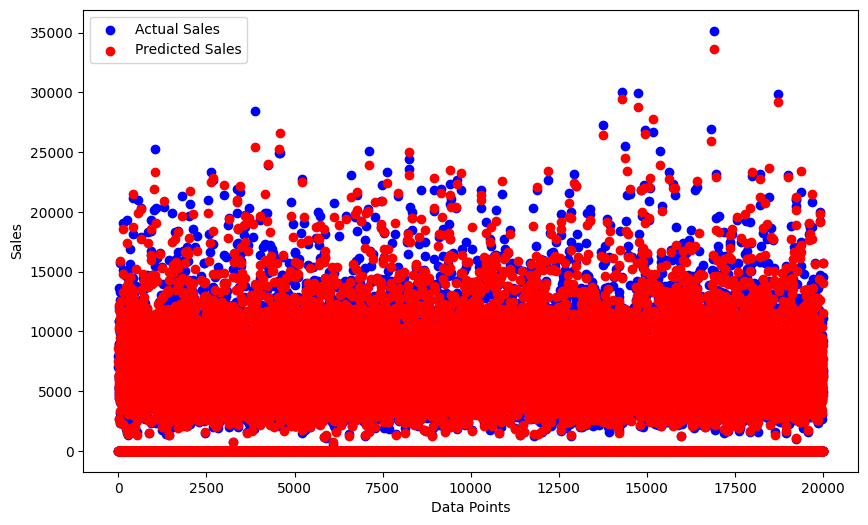

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [43]:
logging.info('Calculating RMSE')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 576.845075236029


In [44]:
print(regression_pipeline.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['DayOfWeek', 'Customers', 'Open', 'Promo',
                                  'SchoolHoliday', 'CompetitionDistance',
                                  'Promo2SinceYear', 'Promo2SinceWeek',
                                  'CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear', 'Year', 'Month',
                                  'DayOfMonth', 'WeekOfYear', 'IsMonthStart',
                                  'IsMonthEnd']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['StoreType_a', 'StoreType_b', 'StoreType_c',
                   

In [45]:
# Accessing the RandomForestRegressor from the pipeline
rf_model = regression_pipeline.named_steps['regressor']

# If you're using a ColumnTransformer for preprocessing, access it first
preprocessor = regression_pipeline.named_steps['preprocessor']  # Replace 'preprocessor' with the actual name

# Get the transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Extracting feature importances
importance = rf_model.feature_importances_

# Ensure the lengths match
print(f'Number of transformed features: {len(feature_names)}')
print(f'Number of feature importances: {len(importance)}')

# Creating a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'feature': feature_names,  # Transformed feature names
    'importance': importance
})

# Sorting the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))  # Adjust the number of top features to display


Number of transformed features: 25
Number of feature importances: 25
                           feature  importance
1                   num__Customers    0.858030
5         num__CompetitionDistance    0.030404
19           cat__StoreType_d_True    0.026005
3                       num__Promo    0.020843
21          cat__Assortment_b_True    0.009919
7             num__Promo2SinceWeek    0.009127
8   num__CompetitionOpenSinceMonth    0.008417
9    num__CompetitionOpenSinceYear    0.007717
0                   num__DayOfWeek    0.007091
6             num__Promo2SinceYear    0.005335


In [46]:
logging.info('show the feature importance with a plot')
top_n = 10  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette='viridis')

# Adding labels and title
plt.title(f'Top {top_n} Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

# Show the plot
plt.show()

/tmp/ipykernel_11918/4208987519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n), palette='viridis')


In [47]:
from sklearn.utils import resample
import numpy as np

def bootstrap_predictions(model, X_test, n_iterations=100):
    preds = []
    for i in range(n_iterations):
        X_sample = resample(X_test)
        preds_sample = model.predict(X_sample)
        preds.append(preds_sample)
    preds = np.array(preds)
    lower = np.percentile(preds, 2.5, axis=0)
    upper = np.percentile(preds, 97.5, axis=0)
    return lower, upper

lower_ci, upper_ci = bootstrap_predictions(regression_pipeline, X_test)
